# Neural Networks - Fashion MNIST

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

In [7]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [8]:
x_train.shape
y_train.shape

(60000,)

RGB (Red, Green, Blue) are 8 bit each.
The range for each individual colour is 0-255 (as 2^8 = 256 possibilities).
The combination range is 256*256*256.

By dividing by 255, the 0-255 range can be described with a 0.0-1.0 range where 0.0 means 0 (0x00) and 1.0 means 255 (0xFF).


In [9]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [10]:
labels = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

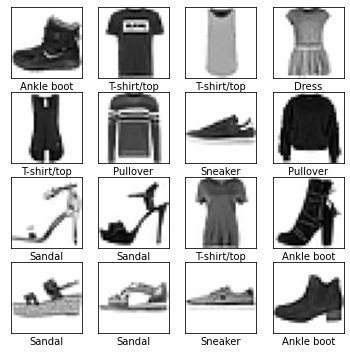

In [11]:
plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = plt.cm.binary)
    plt.xlabel(labels[y_train[i]])
plt.show()

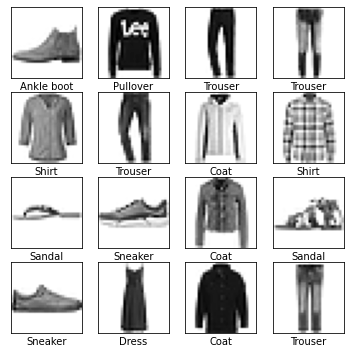

In [12]:
plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap = plt.cm.binary)
    plt.xlabel(labels[y_test[i]])
plt.show()

Convert train labels to one-hot encoding

In [13]:
y_train_encoded = to_categorical(y_train)
print(y_train[50])
print(y_train_encoded[50])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [14]:
x_tt, x_tv, y_tt, y_tv = train_test_split(x_train, y_train_encoded, test_size = 0.2)

In [15]:
print(x_tt.shape, y_tt.shape)

print(x_tv.shape, y_tv.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)


In [70]:
x_tt_expanded = np.expand_dims(x_tt, 3)
print(x_tt_expanded.shape)

x_tv_expanded = np.expand_dims(x_tv, 3)
print(x_tv_expanded.shape)

x_test_expanded = np.expand_dims(x_test, 3)
print(x_test_expanded.shape)


(48000, 28, 28, 1)
(12000, 28, 28, 1)
(10000, 28, 28, 1)


# Multi-Layer Perceptron

In [17]:
from keras import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Softmax
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [18]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [19]:
cb = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [20]:
model.compile(optimizer=Adam(learning_rate = 0.01, clipnorm = 1),
              loss='categorical_crossentropy')

In [21]:
history = model.fit(x = x_tt, 
                    y = y_tt, 
                    validation_data = (x_tv, y_tv), 
                    epochs = 200, 
                    batch_size = 200, 
                    callbacks=[cb], 
                    verbose = 0)

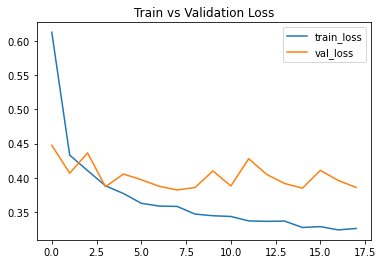

In [22]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['train_loss', 'val_loss'])
plt.title('Train vs Validation Loss')
plt.show()

In [23]:
y_pred = np.argmax(model.predict(x_test), axis=1)
print(y_pred)
print(y_test)

[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]


In [24]:
print('Accuracy score:', accuracy_score(y_test, y_pred)*100,'%')

Accuracy score: 85.39 %


In [26]:
confusion_matrix(y_test, y_pred)

array([[761,   9,  19,  42,   5,   1, 148,   0,  15,   0],
       [  1, 966,   3,  21,   4,   0,   2,   0,   3,   0],
       [  6,   0, 769,   8, 140,   0,  74,   0,   3,   0],
       [ 23,  14,  18, 850,  41,   0,  49,   0,   5,   0],
       [  0,   2, 101,  25, 807,   0,  63,   0,   2,   0],
       [  1,   0,   0,   0,   0, 923,   2,  58,   2,  14],
       [111,   1, 107,  34,  98,   0, 637,   0,  12,   0],
       [  0,   0,   0,   0,   0,   9,   0, 978,   1,  12],
       [  2,   2,  10,   7,   7,   1,   9,   5, 957,   0],
       [  0,   0,   0,   0,   0,  16,   1,  92,   0, 891]], dtype=int64)

Without early stopping

In [28]:
history = model.fit(x = x_tt, 
                    y = y_tt, 
                    validation_data = (x_tv, y_tv), 
                    epochs = 200, 
                    batch_size = 200, 
                    verbose = 0)

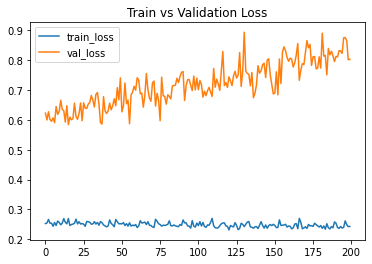

In [29]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['train_loss', 'val_loss'])
plt.title('Train vs Validation Loss')
plt.show()

In [32]:
y_pred = np.argmax(model.predict(x_test), axis=1)
print(y_pred)
print(y_test)

[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]


In [33]:
print('Accuracy score:', accuracy_score(y_test, y_pred)*100,'%')

Accuracy score: 84.92 %


In [34]:
confusion_matrix(y_test, y_pred)

array([[760,   5,  20,  42,   3,   1, 163,   1,   5,   0],
       [  2, 958,   7,  23,   5,   0,   4,   0,   1,   0],
       [ 10,   1, 737,  14, 140,   0,  90,   0,   8,   0],
       [ 24,  17,  21, 837,  43,   0,  51,   0,   7,   0],
       [  1,   1, 100,  29, 792,   0,  72,   0,   5,   0],
       [  1,   0,   1,   1,   0, 934,   1,  25,   2,  35],
       [106,   3, 101,  38,  89,   0, 655,   0,   8,   0],
       [  0,   0,   0,   0,   0,  23,   0, 944,   0,  33],
       [  2,   0,  15,   4,   8,   3,  16,  15, 937,   0],
       [  2,   0,   0,   0,   0,   9,   0,  51,   0, 938]], dtype=int64)

# Convulutional Neural Networks

In [81]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from tensorflow import keras

In [62]:
cnn_model = Sequential()
cnn_model.add(Conv2D(16, 3, activation = 'relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(16, 3, activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

cnn_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                12832     
_________________________________________________________________
dense_16 (Dense)             (None, 10)              

In [64]:
cnn_model.compile(optimizer=Adam(learning_rate = 0.01, clipnorm = 1),
                  loss='categorical_crossentropy')

In [65]:
cb = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [66]:
history = cnn_model.fit(x = x_tt_expanded, 
                        y = y_tt, 
                        validation_data = (x_tv_expanded, y_tv), 
                        epochs = 200, 
                        batch_size = 200, 
                        callbacks=[cb], 
                        verbose = 0)

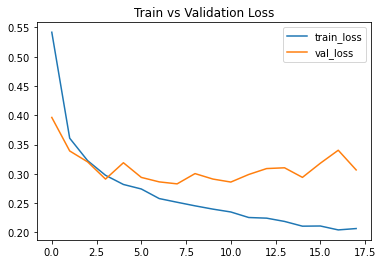

In [67]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['train_loss', 'val_loss'])
plt.title('Train vs Validation Loss')
plt.show()

In [71]:
y_pred = np.argmax(cnn_model.predict(x_test_expanded), axis=1)
print(y_pred)
print(y_test)

[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]


In [73]:
print('Accuracy score:', accuracy_score(y_test, y_pred)*100,'%')

Accuracy score: 89.1 %


In [75]:
confusion_matrix(y_test, y_pred)

array([[826,   1,  19,  18,   3,   0, 126,   0,   7,   0],
       [  0, 980,   0,  17,   0,   0,   2,   0,   1,   0],
       [ 19,   0, 882,   9,  40,   0,  50,   0,   0,   0],
       [ 15,   7,   9, 916,  15,   0,  38,   0,   0,   0],
       [  1,   4, 101,  38, 780,   1,  73,   0,   2,   0],
       [  0,   0,   0,   1,   0, 981,   0,  16,   0,   2],
       [119,   3,  98,  32,  67,   0, 674,   0,   7,   0],
       [  0,   0,   0,   0,   0,  10,   0, 970,   0,  20],
       [  6,   0,   5,   8,   2,   3,   8,   4, 964,   0],
       [  2,   0,   0,   0,   0,   8,   0,  53,   0, 937]], dtype=int64)

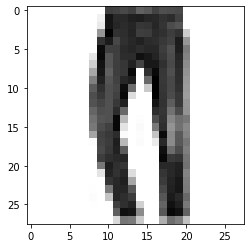

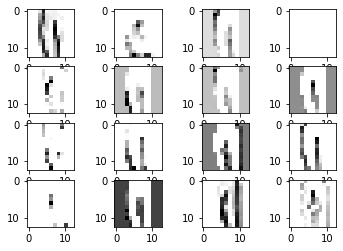

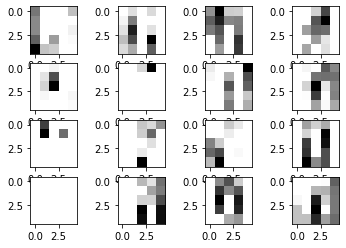

In [94]:
def visualize_activations(conv_model,layer_idx,image):
    plt.figure(0)
    plt.imshow(image,cmap=plt.cm.binary)
    outputs = [conv_model.layers[i].output for i in layer_idx]
    
    visual = keras.Model(inputs = conv_model.inputs, outputs = outputs)
    
    features = visual.predict(np.expand_dims(np.expand_dims(image,0),3))  
        
    f = 1
    for fmap in features:
            square = int(np.round(np.sqrt(fmap.shape[3])))
            plt.figure(f)
            for ix in range(fmap.shape[3]):
                 plt.subplot(square, square, ix+1)
                 plt.imshow(fmap[0,:, :, ix], cmap=plt.cm.binary)
            plt.show()
            plt.pause(2)
            f +=1
            
visualize_activations(cnn_model, [1,3], x_test[5])